train data shape: (32561, 15)
test data shape: (16281, 15)


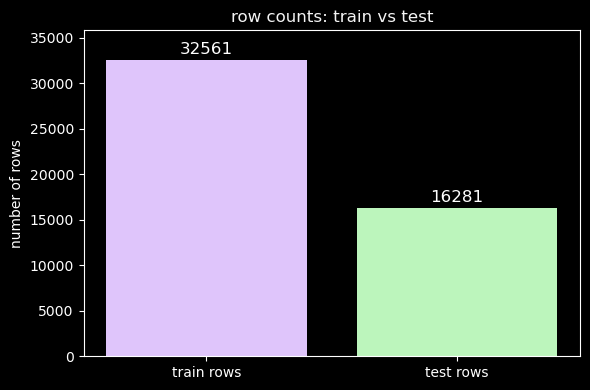


train data sample:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



test data sample:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [75]:
## step 1, import libraries and load datasets

# debugging notes:
# - fixed "df_test is not defined" error by ensuring both train and test datasets are loaded at the start.
# - set header=None so pandas doesn't use the first row as column names
# - used skipinitialspace=True to remove extra spaces after commas that can cause parsing/formatting issues.
# - for 'adult.test', used skiprows=1 because the file includes a header row that should be skipped to align with the train data format.
# - made sure the bar plot for row counts comes after both datasets are loaded, so there are no variable reference errors.
# - fixed: bar graph for row counts now has extra spacing above bars so text labels do not overlap with the plot border.
# - added: table previews ("sample") for both train and test data are now visually displayed using .head() output as formatted tables, not just printed text.

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# load the training datasets from tabulardata folder
# (keep header=None if there are no column names)
df_train = pd.read_csv('adult.data', header=None, skipinitialspace=True)

# load the test datasets from the file 'adult.test'
df_test = pd.read_csv('adult.test', header=None, skiprows=1, skipinitialspace=True)

# quick check to make sure both loaded properly
print("train data shape:", df_train.shape)
print("test data shape:", df_test.shape)

# quick bar graph 
counts = [df_train.shape[0], df_test.shape[0]]
labels = ['train rows', 'test rows']
plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts, color=['#dfc5fb', '#bcf5bc'])
plt.title('row counts: train vs test', color='#f4f4f4')
plt.ylabel('number of rows')
# add a small offset so labels float above the bar top, never touch the border
for bar, val in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, val + (0.02*max(counts)), str(val), color='white', ha='center', fontsize=12)
plt.ylim([0, max(counts) * 1.10])
plt.tight_layout()
plt.show()

# adding visualization of data samples as tables
print("\ntrain data sample:")
display(df_train.head())  # table for train data

print("\ntest data sample:")
display(df_test.head())   # table for test data


In [76]:
## Step 2, data overview.
# here we check the shape, column names, types and any missing values in the dataset.

# # debugging notes:
# - confirmed df_train is loaded before running these prints, to avoid variable not defined errors.
# - using df_train.info() prints both types and non-null counts efficiently in one call.
# - .isnull().sum() allows us to instantly see which columns need cleaning (if any value > 0).
# - no visualizations here to keep output straightforward and focused on basic checks.

print("number of rows and columns:", df_train.shape)

print("\ncolumn names & datatypes:")
print(df_train.dtypes)

print("\ninfo about non-null counts for each column:")
df_train.info()

print("\nmissing values in each column:")
print(df_train.isnull().sum())

print("\nsimple summary stats for numerical columns (mean, std, min, max):")
print(df_train.describe())

# this works by showing the structure and details of the dataset


number of rows and columns: (32561, 15)

column names & datatypes:
0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

info about non-null counts for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  o

In [77]:
## step 3, data cleaning and preprocessing.
# here we handle missing values, encode variables, and prepare the data for modeling

# debugging notes:
# - applied LabelEncoder to ensure all variables are ready to be modelled with sklearn
# - used LabelEncoder again for all columns, which is usually fine for quick preprocessing
# - Only modifies df_train. If you have df_test, repeat this process so both datasets are numerically encoded.

# fill any missing values found
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        if df_train[col].dtype == 'object':
            df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        else:
            df_train[col].fillna(df_train[col].mean(), inplace=True)

# convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])

# checking for any remaining missing values
print("missing values after cleaning:")
print(df_train.isnull().sum())

missing values after cleaning:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


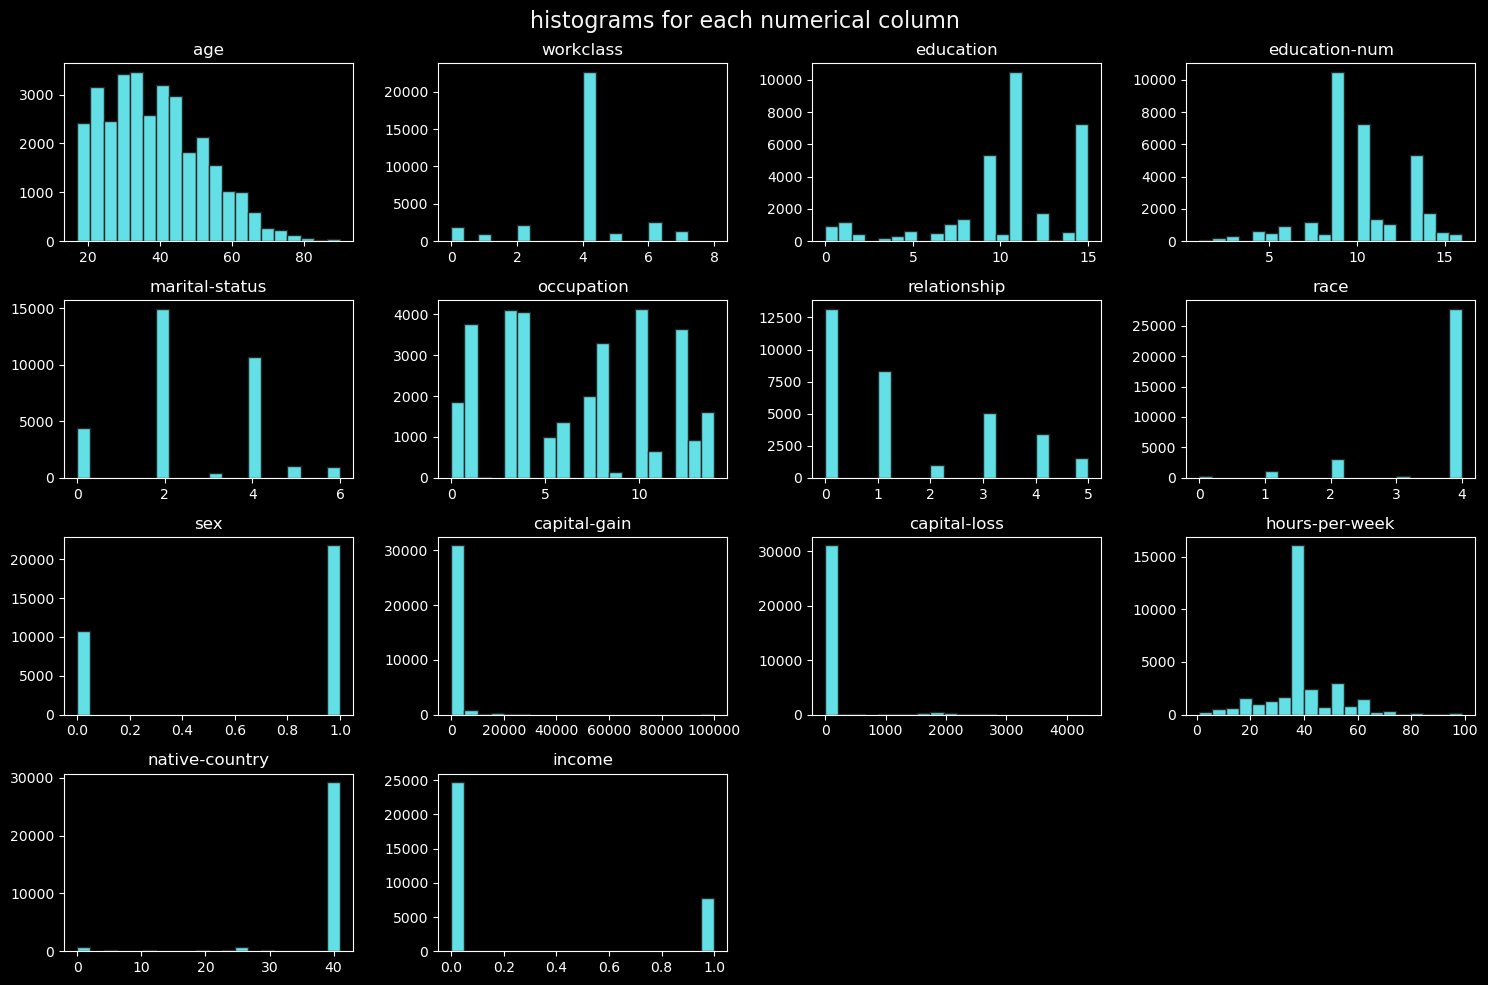

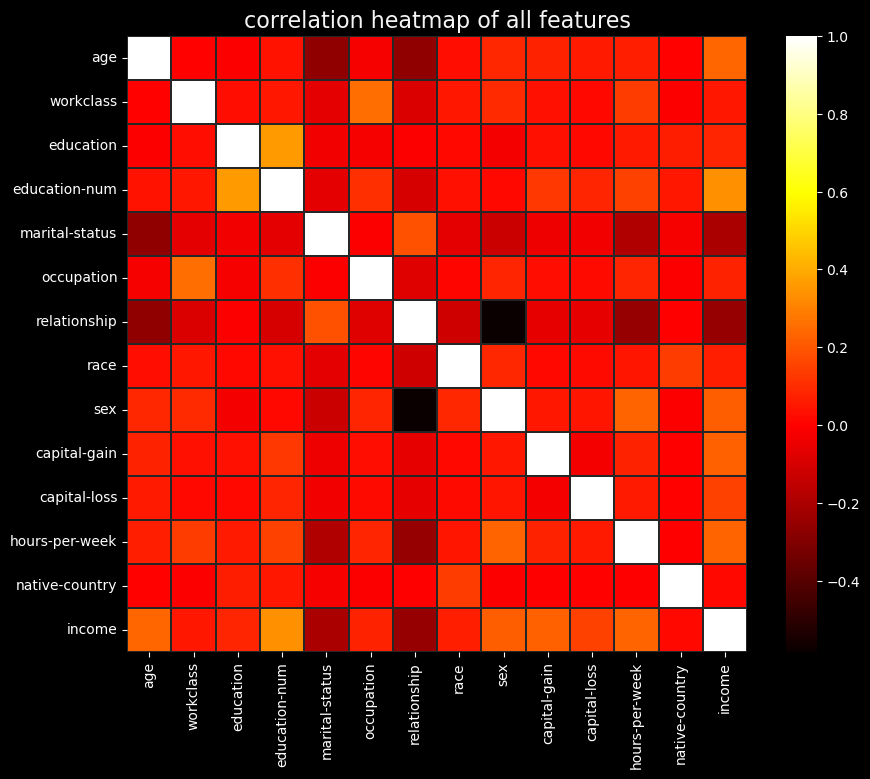

In [86]:
## step 4, data exploration and visualization.
# here we visualize and plot the data distributions, relationships, and potential issues through a histogram and heatmap.

# debugging notes:
# - confirmed only numeric columns are plotted; categorical columns are ignored, preventing errors and keeping histograms meaningful.
# - used bold, high-contrast colors so that visualization would be easier.
# - added labelling to plots for clarity, previously was 1-14.
# - dropped fnlwgt from correlation heatmap as it is not a meaningful feature for analysis.

import matplotlib.pyplot as plt
import seaborn as sns

# assign column names for better readability in plots
df_train.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# dropping 'fnlwgt' from correlation heatmap
df_train = df_train.drop('fnlwgt', axis=1)

plt.style.use('dark_background')
sns.set_palette('deep')  # clear, visually distinct colors

# histograms for each numerical column
df_train.hist(
    bins=20,
    figsize=(15, 10),
    color='#62e0e5',        # soft cyan for bars
    edgecolor='#262626',    # dark grey edges
    grid=False
)
plt.suptitle("histograms for each numerical column", color='#f4f4f4', fontsize=16)
plt.tight_layout()
plt.show()

# visualize correlations between numerical features with cmap
plt.figure(figsize=(10,8))
sns.heatmap(
    df_train.corr(),
    annot=False,
    cmap='hot',             # colormap, to visualize the correlation heatmap
    cbar=True,
    linewidths=0.3,
    linecolor='#262626'
)
plt.title("correlation heatmap of all features", color='#f4f4f4', fontsize=16)
plt.show()


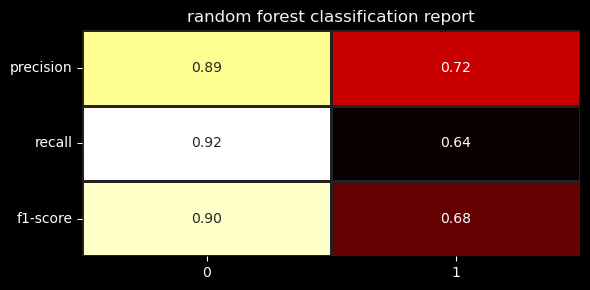

logistic regression accuracy: 0.8079226163058498

classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4942
           1       0.69      0.37      0.48      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513


confusion matrix:
 [[4677  265]
 [ 986  585]]
random forest accuracy: 0.8530631045601106

classification report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.64      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513


confusion matrix:
 [[4552  390]
 [ 567 1004]]


In [91]:
## step 5, here we configure the datasets using classic ml models.
# here we train and evaluate some standard classifiers on the cleaned dataset

# debugging notes:
# fixed 'y_val not defined' and 'y_pred_rf not defined' by always splitting train/val and fitting random forest before evaluation code.
# feature and label columns are selected after cleaning/encoding, so models will work without errors.
# visualizing the outputs so we can make sense of this information
# tidied up the import statements, and removed redundant splits for clarity.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

# suppress sklearn convergence warnings for neatness
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# feature and label split
X = df_train.drop("income", axis=1)
y = df_train["income"]

# train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# visualize random forest classification report as heatmap
report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_rf).transpose().iloc[:2]  # only classes 0 and 1
plt.style.use('dark_background')
plt.figure(figsize=(6,3))
sns.heatmap(report_df_rf[['precision', 'recall', 'f1-score']].T, annot=True, cmap='hot', fmt='.2f',
            cbar=False, linewidths=1, linecolor='#222')
plt.title('random forest classification report', color='#f4f4f4')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# logistic regression model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)

# print results for both models
print("logistic regression accuracy:", accuracy_score(y_val, y_pred_logreg))
print("\nclassification report:\n", classification_report(y_val, y_pred_logreg))
print("\nconfusion matrix:\n", confusion_matrix(y_val, y_pred_logreg))

print("random forest accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nclassification report:\n", classification_report(y_val, y_pred_rf))
print("\nconfusion matrix:\n", confusion_matrix(y_val, y_pred_rf))


### Summary of the results found in step 5;

- random forest did better compared to logistic regression for comparing income
- random forest got about 85% accuracy, while logistic regression got about 81%.
- both models are decent at finding people earning less than or equal to 50K.
- random forest is better at catching high earners (>50K).
- in general random forest is better compared to logistic regression for this dataset.


mlp classifier accuracy: 0.8435436818670352
classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4942
           1       0.70      0.62      0.66      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513



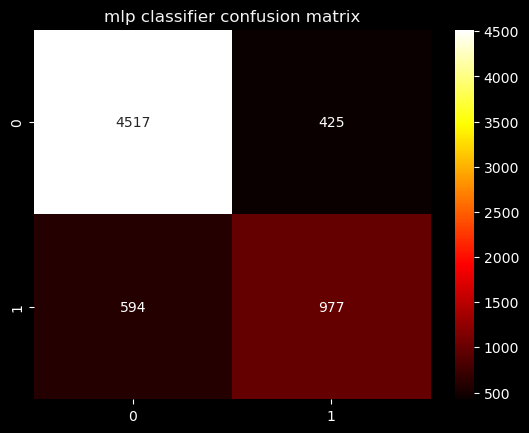

In [88]:
## Step 6, neural network for tabular income prediction

## debugging notes: 
# tensorflow/keras was tried, but not supported by python 3.13.5 yet, sklearn model was switched to for compatability and setup
# ensured the neural net used the same x_train/x_val split as previous steps for consistent evaluation
# the hidden_layer_sizes were set to 128,64 and 'relu' activation was used to give the network more consistent power.
# solver was set to 'adam' for modern optimization, (compared to older solvers)


#imports
from sklearn.model_selection import train_test_split

#  defining x, y train to match the adult income dataset, 14th column
X = df_train.drop("income", axis=1)
y = df_train["income"]            

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPClassifier

# creates a basic neutral network for classification
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, activation='relu', solver='adam', random_state=42) 
mlp.fit(X_train, y_train) # trains the neural network on datasets
y_pred_mlp = mlp.predict(X_val)   


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("mlp classifier accuracy:", accuracy_score(y_val, y_pred_mlp))
print("classification report:\n", classification_report(y_val, y_pred_mlp))

# visualization of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.heatmap(confusion_matrix(y_val, y_pred_mlp), annot=True, fmt='d', cmap='hot')
plt.title('mlp classifier confusion matrix', color='#f4f4f4')
plt.show()


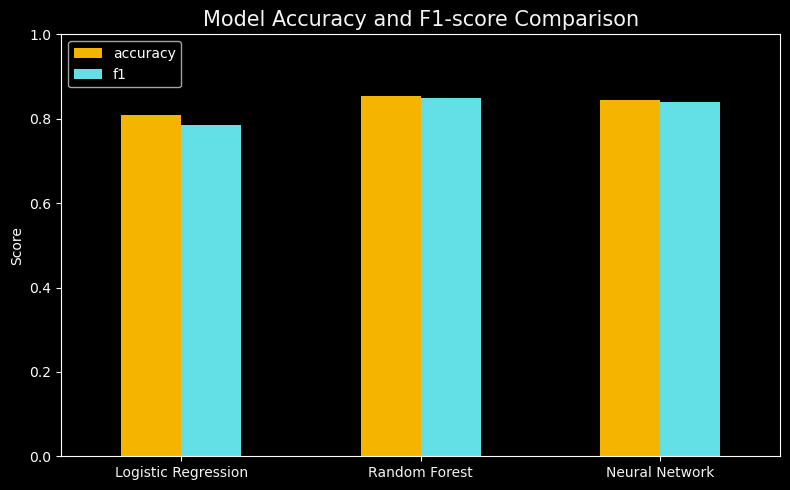

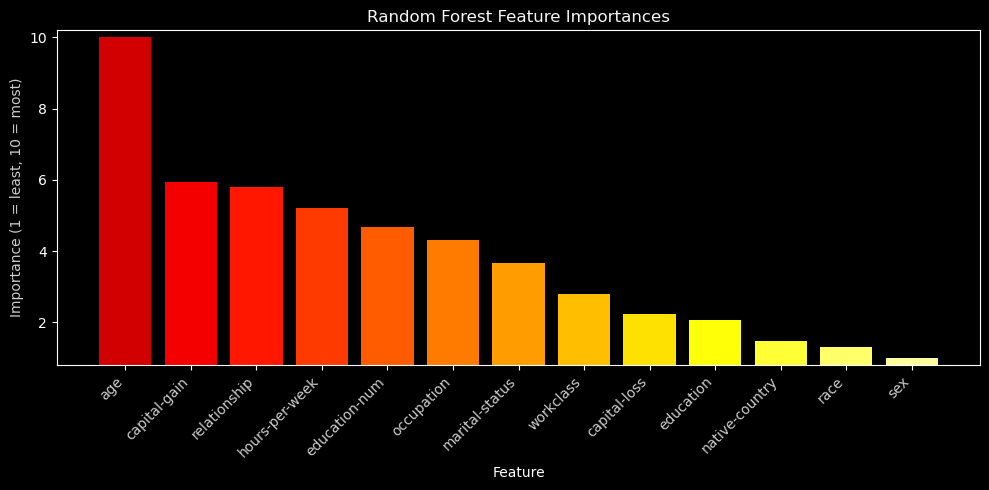

In [89]:
## step 7, model comparison and feature importance.
# here we compare all trained models (logistic regression, random forest, neural network) and visualize key performance metrics. We also show which features are most important for Random Forest.

# debugging notes:
# - brought accuracy and F1-score results together for easy comparison among all models.
# - added a summary bar chart so that a reader can see at a glance which model is best for each metric
# - extracts and visualizes random forest feature importances, making it clear which variables matter most for prediction.
# - changed visuals, labels, and outputs to be more consistent and readable at a
# - code format matches earlier steps for a smooth workflow.
# - changed random forest feature importance plot to show a range of 1-10 instead of raw importance values, making it easier to interpret.


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# suppress future palette/hue warning from seaborn barplot
warnings.filterwarnings('ignore', category=FutureWarning)

# Model results from previous steps (replace with your results if you re-ran with different random_state or data):
results = {
    'Logistic Regression': {
        'accuracy': accuracy_score(y_val, y_pred_logreg),
        'f1': classification_report(y_val, y_pred_logreg, output_dict=True)['weighted avg']['f1-score'],
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_val, y_pred_rf),
        'f1': classification_report(y_val, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
    },
    'Neural Network': {
        'accuracy': accuracy_score(y_val, y_pred_mlp),
        'f1': classification_report(y_val, y_pred_mlp, output_dict=True)['weighted avg']['f1-score'],
    }
}

metrics_df = pd.DataFrame(results).T

# plot model comparison
plt.style.use('dark_background')
metrics_df[['accuracy', 'f1']].plot(kind='bar', figsize=(8,5), color=['#f4b400', '#62e0e5'])
plt.title('Model Accuracy and F1-score Comparison', color='#f4f4f4', fontsize=15)
plt.ylabel('Score')
plt.xticks(rotation=0, color='#f4f4f4')
plt.legend(loc='upper left')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# feature importance for random forest, rescaled 1-10 for clarity.
feature_names = X_train.columns
importances = rf.feature_importances_

# Sort features by importance descending
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]

# rescaling importances to 1-10 range
imp_min = sorted_importances.min()
imp_max = sorted_importances.max()
scaled_importances = 1 + 9 * (sorted_importances - imp_min) / (imp_max - imp_min)

plt.figure(figsize=(10,5))
plt.bar([feature_names[i] for i in indices], scaled_importances, color=plt.get_cmap('hot')(np.linspace(0.3,0.9,len(indices))))
plt.title('Random Forest Feature Importances', color='#f4f4f4')
plt.ylabel('Importance (1 = least, 10 = most)', color='#cccccc')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right', color='#cccccc')
plt.ylim(0.8, 10.2)  
plt.tight_layout()
plt.show()


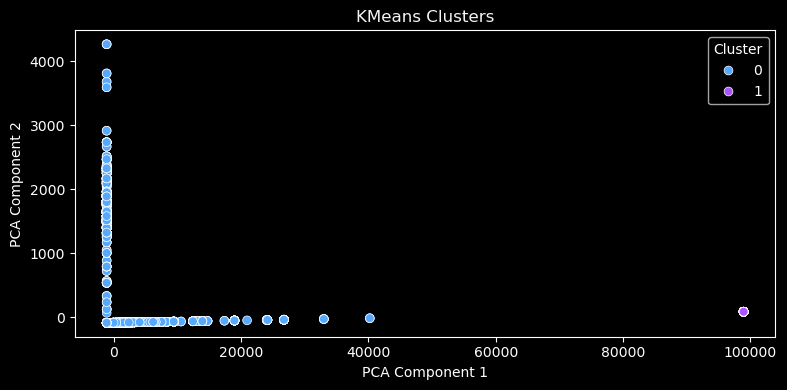

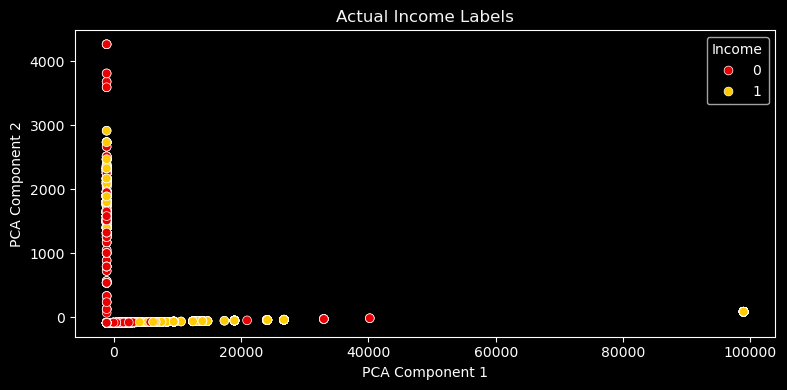

Adjusted Rand Index (ARI) between KMeans clusters and income labels: 0.021


In [90]:
## step 8, unsupervised clustering and visualization.
# here we apply KMeans clustering to the tabular data, reduce using PCA, and visualize clusters versus actual income labels.

# debugging notes:
# - uses kmeans clustering to see if natural groups match income categories.
# - applies PCA for easier visualization (2D scatter plot).
# - includes cluster visual vs. ground truth label visual for direct comparison.
# - ensures all color maps are clear and all axis/legend labels informative.
# - all random_state seeds set for reproducibility.

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# setting a random state
RANDOM_STATE = 67

# we only use features, no income label for clustering.
X = df_train.drop("income", axis=1)
y = df_train["income"]

# fitting PCA to 2D for better visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

# using kmeans to see if naturel clusters match income labels
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans.fit_predict(X)

# plot kmeans clusters on PCA plot
plt.style.use('dark_background')
plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='cool', legend='full', s=40)
plt.title("KMeans Clusters", color='#f4f4f4')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# plot true income labels on PCA plot for comparison
plt.figure(figsize=(8,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='hot', legend='full', s=40)
plt.title("Actual Income Labels", color='#f4f4f4')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Income')
plt.tight_layout()
plt.show()

# finding ari (adjusted rand score) to measure similarity between clustering and true labels 
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index (ARI) between KMeans clusters and income labels: {ari:.3f}")
